> # **Name : Abhishek Subhash Swami**

> # **Roll No. 13**

---

# Experiment No. 7 : Exploratory Data Analysis I

In [65]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Univariate Analysis

In [66]:
import pandas as pd
#read dataset

data=pd.read_csv('/content/drive/MyDrive/Data/toy.csv')
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


### Get summary about data

In [67]:
summary=data.describe()
print(summary)

              Number            Age         Income
count  150000.000000  150000.000000  150000.000000
mean    75000.500000      44.950200   91252.798273
std     43301.414527      11.572486   24989.500948
min         1.000000      25.000000    -654.000000
25%     37500.750000      35.000000   80867.750000
50%     75000.500000      45.000000   93655.000000
75%    112500.250000      55.000000  104519.000000
max    150000.000000      65.000000  177157.000000


### Plot histogram

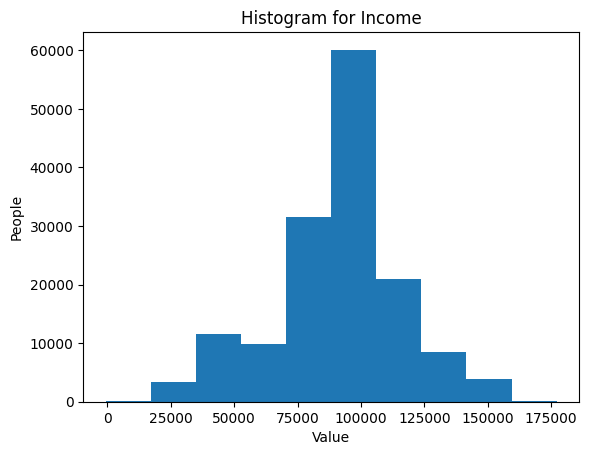

In [68]:
import matplotlib.pyplot as plt

plt.hist(data['Income'],bins=10)
plt.title('Histogram for Income')
plt.xlabel('Value')
plt.ylabel('People')
plt.show()

## Bivariate Analysis

### Create a scatter plot

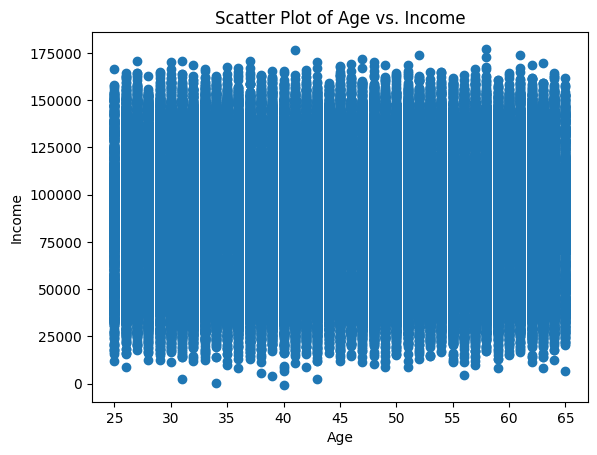

In [69]:
plt.scatter(data['Age'], data['Income'])
plt.title('Scatter Plot of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


### Calculate correlation coefficient

In [70]:

corr = data['Age'].corr(data['Income'])
print('Correlation coefficient:', corr)


Correlation coefficient: -0.0013181143630648059


## Multivariate Analysis

### Create a correlation matrix


In [79]:
corr_matrix = data.corr()
print(corr_matrix)


          Number       Age    Income
Number  1.000000 -0.003441  0.286131
Age    -0.003441  1.000000 -0.001452
Income  0.286131 -0.001452  1.000000


<ipython-input-79-f8f8a84fc5b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr(method='spearman')


### Create a heat map of the correlation matrix


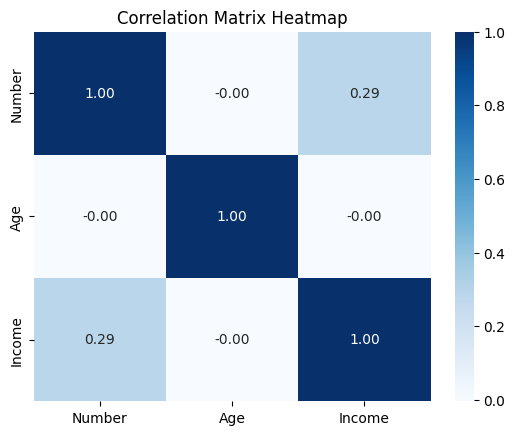

In [85]:
import seaborn as sns

c=sns.heatmap(corr_matrix, cmap='Blues', annot=True,fmt='0.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


<ipython-input-87-0204110c579d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr(method='spearman')


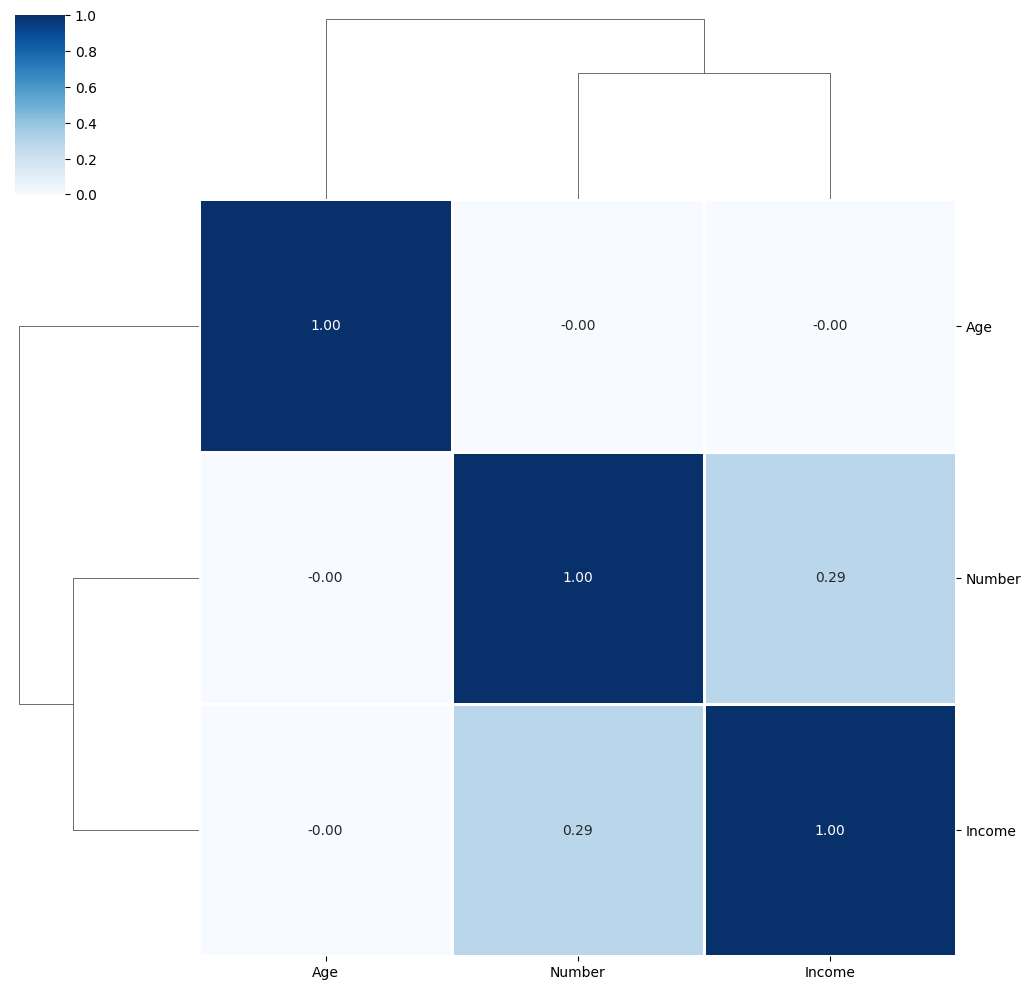

In [87]:
corrmat = data.corr(method='spearman')
c= sns.clustermap(corrmat, cmap="Blues", linewidths=1,annot=True,fmt='0.2f')
plt.setp(c.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
c

## Handling null values from dataset

In [145]:
data1=pd.read_csv('/content/drive/MyDrive/Data/data.csv')
data1.head()

,Name,Age,Gender,Experience,Salary,Children,Vehicles
0,A,35,Male,9.0,3988534.0,3.0,1.0
1,B,64,Male,12.0,1057144.0,2.0,0.0
2,C,53,Female,9.0,NaN,2.0,1.0
3,D,54,Female,NaN,5127406.0,0.0,3.0
4,E,43,Male,6.0,3824105.0,0.0,NaN


In [146]:
data1.isnull().sum()

Name          0
Age           0
Gender        0
Experience    3
Salary        4
Children      4
Vehicles      2
dtype: int64

#### drop NA values

In [147]:
# Drop rows with null values
dropped=data1.dropna(axis=0)
dropped

,Name,Age,Gender,Experience,Salary,Children,Vehicles
0,A,35,Male,9.0,3988534.0,3.0,1.0
1,B,64,Male,12.0,1057144.0,2.0,0.0
6,G,49,Female,9.0,2068752.0,2.0,0.0
7,H,49,Male,9.0,4749122.0,3.0,1.0
10,K,53,Female,4.0,3590267.0,3.0,1.0
11,L,70,Female,11.0,3281407.0,2.0,3.0
15,P,49,Female,5.0,5305861.0,3.0,0.0
16,Q,59,Male,9.0,4769568.0,3.0,1.0
18,S,49,Male,11.0,4511462.0,2.0,1.0


In [148]:
# Drop columns with null values
data1.dropna(axis=1).head()

,Name,Age,Gender
0,A,35,Male
1,B,64,Male
2,C,53,Female
3,D,54,Female
4,E,43,Male


#### Replace null values with 0

In [149]:
# Replace null values with 0
new=data1.fillna(0)
new.head()

,Name,Age,Gender,Experience,Salary,Children,Vehicles
0,A,35,Male,9.0,3988534.0,3.0,1.0
1,B,64,Male,12.0,1057144.0,2.0,0.0
2,C,53,Female,9.0,0.0,2.0,1.0
3,D,54,Female,0.0,5127406.0,0.0,3.0
4,E,43,Male,6.0,3824105.0,0.0,0.0


In [150]:
#interpolate
data2=data1.interpolate()
numeric_columns = data1.select_dtypes(include=['int64', 'float64']).columns.tolist()
data2[numeric_columns]=data2[numeric_columns].astype(int)
data2.head()

,Name,Age,Gender,Experience,Salary,Children,Vehicles
0,A,35,Male,9,3988534,3,1
1,B,64,Male,12,1057144,2,0
2,C,53,Female,9,3092275,2,1
3,D,54,Female,7,5127406,0,3
4,E,43,Male,6,3824105,0,1


## DBSCAN

> DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together in a high-density region and separates out points that are isolated in low-density regions.

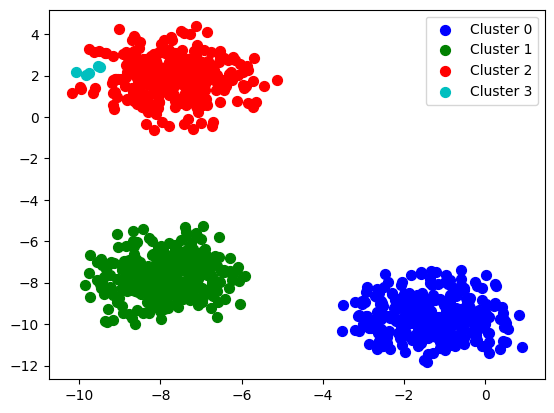

In [158]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=1000, centers=3)

# Instantiate DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the data
dbscan.fit(X)

# Get the cluster labels and number of clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Plot the data points colored by their cluster labels
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i % len(colors)], label='Cluster %d' % i)
plt.legend()
plt.show()
